In [11]:
shutil.which("ffmpeg")

'/home/cicid/miniconda3/envs/multiff_clean/bin/ffmpeg'

## Install packages

In [ ]:
# !pip install neo
# !pip install matplotlib_scalebar
# !pip install ffmpeg
# !pip install wheel==0.38.4
# !pip3 install setuptools==65.5.0
# !pip install stable_baselines3
# !pip install optuna

  Using cached ffmpeg-1.4-py3-none-any.whl
  Using cached setuptools-65.5.0-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-65.5.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 72.1.0
    Uninstalling setuptools-72.1.0:
      Successfully uninstalled setuptools-72.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [optuna]2m4/5 [optuna]]


## import packages

In [2]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

 

from data_wrangling import specific_utils, process_monkey_information
from pattern_discovery import pattern_by_trials, make_ff_dataframe, pattern_by_trials, organize_patterns_and_features
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics
from visualization.animation import animation_func, animation_utils, animation_class
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data, process_agent_data, env_for_sb3
from machine_learning.RL.lstm import GRU_functions, LSTM_functions
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import optuna
import matplotlib
import matplotlib.animation as animation
from matplotlib import rc
from stable_baselines3 import SAC
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import plot_results
from stable_baselines3.common.callbacks import StopTrainingOnNoModelImprovement
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
from IPython.display import HTML
from functools import partial
from itertools import product
import pandas as pd
from os.path import exists
import random
from importlib import reload
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement, StopTrainingOnRewardThreshold
import gc

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
torch.set_printoptions(sci_mode=False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)

import os, shutil

matplotlib.rcParams["animation.ffmpeg_path"] = shutil.which("ffmpeg")
matplotlib.rcParams["animation.writer"] = "ffmpeg"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
stop!

## basic parameters

In [ ]:
overall_folder = "RL_models/SB3_stored_models/all_agents/gen_5/"
os.makedirs(overall_folder, exist_ok=True)
PLAYER = "agent"
# NEW_DATASET = True
# MONKEY_DATA = False
# NO_PLOT_NEEDED = True
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219"
# data_folder_name = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219/processed_data"
#data_num = 19


# # for agent
# PLAYER = "agent"
# NEW_DATASET = True
# MONKEY_DATA = False
# NO_PLOT_NEEDED = True
# data_folder_name = "env.multiff_analysis/RL_models/LSTM_July_29"
# data_num = 721
# trial_total_num = 30

# Streamline training agent

## Train

In [8]:
model_folder_name = "RL_models/SB3_stored_models/all_agents/regular"

In [ ]:
# model_folder_name = "RL_models/SB3_stored_models/all_agents/temp_10_11"

In [ ]:
model_folder_name = "RL_models/SB3_stored_models/all_agents/oct_12_6"
os.makedirs(model_folder_name, exist_ok=True)

env_kwargs = {}
env = env_for_sb3.EnvForSB3(**env_kwargs)
env = Monitor(env, model_folder_name)

# For direct training
sac_model = SAC("MlpPolicy", 
            env,
            gamma=0.998,
            learning_rate=0.0015,
            batch_size=1024,
            target_update_interval=50,
            buffer_size=1000000,
            learning_starts=10000,
            train_freq=10,
            ent_coef='auto',
            policy_kwargs=dict(activation_fn=nn.Tanh, net_arch=[128, 128])
            )


callback = SB3_functions.SaveOnBestTrainingRewardCallback(check_freq=20000, model_folder_name=model_folder_name)
#timesteps = 50000000
timesteps = 200000
sac_model.learn(total_timesteps=int(timesteps), callback=callback)
plot_results([model_folder_name], timesteps, results_plotter.X_TIMESTEPS, "env.MultiFF")
plt.show()

## Use class

In [ ]:
model_folder_name = "RL_models/SB3_stored_models/all_agents/oct_13"
RLforFF = sb3_for_multiff_class.SB3forMultifirefly(
    model_folder_name=model_folder_name)
RLforFF.streamline_everything(currentTrial_for_animation = 10, num_trials_for_animation = 5)
RLforFF.collect_data(exists_ok=True, save_data=True)

model_folder_name: RL_models/SB3_stored_models/all_agents/oct_13
Made agent with the following params: {'learning_rate': 0.0003, 'batch_size': 1024, 'target_update_interval': 50, 'buffer_size': 1000000, 'learning_starts': 10000, 'train_freq': TrainFreq(frequency=10, unit=<TrainFrequencyUnit.STEP: 'step'>), 'gradient_steps': 10, 'ent_coef': 'auto', 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>, 'net_arch': [256, 128], 'use_sde': False}, 'gamma': 0.998}
There was an error retrieving agent or replay_buffer in RL_models/SB3_stored_models/all_agents/oct_13/best_model.zip. Error message [Errno 2] No such file or directory: 'RL_models/SB3_stored_models/all_agents/oct_13/best_model.zip.zip'
Failed to load existing agent. Need to train a new agent. Error:  There was an error retrieving agent or replay_buffer in RL_models/SB3_stored_models/all_agents/oct_13/best_model.zip. Error message [Errno 2] No such file or directory: 'RL_models/SB3_stored_models/all_agents/o

CurrentTrial and num_trials are set to be None because of the following error: index 0 is out of bounds for axis 0 with size 0
Number of frames is: 298
CurrentTrial and num_trials are set to be None because of the following error: index 0 is out of bounds for axis 0 with size 0
Number of frames for the animation is: 149
Saving animation as: RL_models/SB3_stored_models/all_collected_data/processed_data/oct_12_6/individual_data_sessions/data_0/dv10_dw10_w3_memT3__10s_to_40s_rate_0.25.mp4
2025-10-13 12:53:38,709 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-13 12:53:38,711 - INFO - MovieWriter._run: running command: /home/cicid/miniconda3/envs/multiff_clean/bin/ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y RL_models/SB3_stored_models/all_collected_data/processed_data/oct_12_6/individual_data_sessions/data_0/dv10_dw10_w3_memT3__10s_to_40s_rate_0.25.mp4
Animation is save

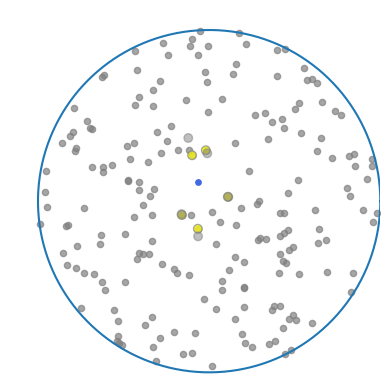

In [5]:
RLforFF.set_animation_parameters(duration=[10, 40],k=1)
RLforFF.call_animation_function()

In [6]:
from IPython.display import Video
Video(RLforFF.video_path_name, embed=True)

# Streamline loading agent

## Make files for logging

(Only have to do once)

In [ ]:
import os
import pandas as pd

def ensure_csv(folder: str, filename: str, columns: list[str]) -> None:
    filepath = os.path.join(folder, filename)
    if not os.path.exists(filepath):
        pd.DataFrame(columns=columns).to_csv(filepath, index=False)

common_cols = ['dv_cost_factor', 'dw_cost_factor', 'w_cost_factor',
               'v_noise_std', 'w_noise_std', 'ffr_noise_scale', 'num_obs_ff', 'max_in_memory_time']

ensure_csv(overall_folder, 'family_of_agents_log.csv',
           common_cols + ['finished_training', 'year', 'month', 'date',
                          'training_time', 'successful_training'])

ensure_csv(overall_folder, 'parameters_record.csv',
           common_cols + ['working'])

ensure_csv(overall_folder, 'pattern_frequencies_record.csv',
           common_cols + ['two_in_a_row', 'three_in_a_row', 'four_in_a_row', 'one_in_a_row',
                          'multiple_in_a_row', 'multiple_in_a_row_all', 'visible_before_last_one',
                          'disappear_latest', 'ignore_sudden_flash', 'try_a_few_times',
                          'give_up_after_trying', 'cluster_around_target',
                          'waste_cluster_around_target', 'ff_capture_rate', 'stop_success_rate'])

feature_cols = common_cols + ['t', 't_last_vis', 'd_last_vis', 'abs_angle_last_vis',
                              'hitting_arena_edge', 'num_stops', 'num_stops_since_last_vis',
                              'num_stops_near_target', 'num_alive_ff_around_target', 'n_ff_in_a_row']

ensure_csv(overall_folder, 'feature_means_record.csv', feature_cols)
ensure_csv(overall_folder, 'feature_medians_record.csv', feature_cols)


Make daily backup

In [ ]:
# back_up_path = overall_folder + 'family_of_agents_log_' + str(time_package.localtime().tm_mon) + '_' + str(time_package.localtime().tm_mday) + '.csv'
# if not exists(back_up_path):
#     family_of_agents_log = pd.read_csv(overall_folder + 'family_of_agents_log.csv').drop(["Unnamed: 0"], axis=1)
#     family_of_agents_log.to_csv(back_up_path)
#     print('A back up of family_of_agents_log is stored in', back_up_path)

## Get monkey data

In [ ]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0220"
data_item = further_processing_class.FurtherProcessing(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()
data_item.make_or_retrieve_all_trial_patterns(exists_ok=True)
data_item.make_or_retrieve_pattern_frequencies(exists_ok=True)
data_item.make_or_retrieve_all_trial_features(exists_ok=True)
data_item.make_or_retrieve_feature_statistics(exists_ok=True)
data_item.make_info_of_monkey()

all_trial_patterns_m = data_item.all_trial_patterns
pattern_frequencies_m = data_item.pattern_frequencies
all_trial_features_m = data_item.all_trial_features
feature_statistics_m = data_item.feature_statistics
info_of_monkey = data_item.info_of_monkey

## Run the class

In [ ]:
overall_folder = 'RL_models/SB3_stored_models/all_agents/gen_0/'

In [ ]:
RLforFF = sb3_for_multiff_class.SB3forMultifirefly(overall_folder=overall_folder, add_date_to_model_folder_name=False)
#RLforFF.import_monkey_data(info_of_monkey, all_trial_features_m, pattern_frequencies_m, feature_statistics_m)
RLforFF.streamline_everything(currentTrial_for_animation = 10, num_trials_for_animation = 5)

In [ ]:
RLforFF.lstm = False

In [ ]:
# timesteps = 10000000        
# stop_train_callback = SB3_functions.StopTrainingOnNoModelImprovement(max_no_improvement_evals=20, min_evals=20, verbose=1, model_folder_name=RLforFF.model_folder_name,                                                   overall_folder=RLforFF.overall_folder, agent_id=RLforFF.agent_id)
# callback = EvalCallback(RLforFF.env, eval_freq=12000, callback_after_eval=stop_train_callback, verbose=1, best_model_save_path=RLforFF.model_folder_name, n_eval_episodes=3)
# RLforFF.sac_model.learn(total_timesteps=int(timesteps), callback=callback)
# RLforFF.successful_training = True

## Collect data (experimentation)

In [ ]:
RLforFF.collect_data(exists_ok=True, save_data=True)

## load

In [ ]:
env_kwargs = {'overall_folder': overall_folder, 
            #   'v_noise_std': 0, 
            #   "w_noise_std": 0,
            #   'ffr_noise_scale': 0, 
            #   'num_obs_ff': 2, 
            #   'max_in_memory_time': 2.5, 
            #   'add_date_to_model_folder_name': False,
            #   
            #   'dv_cost_factor': 10,
            #   'dw_cost_factor': 10,
              }

# alternatively...
RLforFF = sb3_for_multiff_class.SB3forMultifirefly(**env_kwargs)
RLforFF.make_env()
RLforFF.make_agent()
RLforFF.load_agent(load_replay_buffer=False)

## call_animation_function

In [24]:
RLforFF.set_animation_parameters(currentTrial=10, num_trials=5, k=1)
RLforFF.call_animation_function()
# RLforFF.combine_6_plots_for_neural_network()
# RLforFF.calculate_pattern_frequencies_and_feature_statistics()
# RLforFF.plot_side_by_side()
# plot_statistics.plot_pattern_frequencies(RLforFF.combd_pattern_frequencies, compare_monkey_and_agent=True, data_folder_name=RLforFF.model_folder_name)
# #plot_statistics.plot_feature_statistics_for_monkey_and_agent(RLforFF.combd_feature_statistics, data_folder_name = RLforFF.model_folder_name)
# plot_statistics.plot_feature_histograms_for_monkey_and_agent(RLforFF.all_trial_features_valid, RLforFF.all_trial_features_valid, data_folder_name = RLforFF.model_folder_name)

NameError: name 'RLforFF' is not defined

# Loop (for hyperparameter tuning)

## test params

In [ ]:

for dw_cost_factor in range(30, 100, 10):
    params = {
        'dv_cost_factor': 10,
        'dw_cost_factor': dw_cost_factor,
        'w_cost_factor': 10,
    }

    num_obs_ff = 3
    max_in_memory_time = 3
    overall_folder = f'RL_models/SB3_stored_models/all_agents/env1_test_params/ff{num_obs_ff}/'

    env_kwargs = {'num_obs_ff': num_obs_ff,
                'max_in_memory_time': max_in_memory_time,
                'print_ff_capture_incidents': False
                #'reward_per_ff': 120,
    }

    # check if num_obs_ff is consistent with the name in overall_folder. If not, raise an error
    if not f'ff{env_kwargs["num_obs_ff"]}' in overall_folder:
        raise ValueError('num_obs_ff is not consistent with the name in overall_folder')

    gc.collect()
    print("Current parameters: ", params)

    # params = {'time_cost': 0.0, 'dv_cost_factor': 0.0, 'dw_cost_factor': 0.0, 'w_cost_factor': 0.0, 'v_noise_std': 0.0, 'w_noise_std': 0.0}
    RLforFF = sb3_for_multiff_class.SB3forMultifirefly(**params, overall_folder=overall_folder,
                                                        **env_kwargs)

    #RLforFF.import_monkey_data(info_of_monkey, all_trial_features_m, pattern_frequencies_m, feature_statistics_m)
    RLforFF.streamline_everything(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40],
                                    best_model_after_curriculum_exists_ok=True, model_exists_ok=True)

## env1 loop

In [ ]:
# params = {
#           'dv_cost_factor': 10,
#           'dw_cost_factor': 10,
#           'w_cost_factor': 10,
# }

params = {
          'dv_cost_factor': 0,
          'dw_cost_factor': 0,
          'w_cost_factor': 0,
}

for max_in_memory_time in [3, 2, 1]:
    for num_obs_ff in [2, 1, 3, 4, 5]:
        overall_folder = f'RL_models/SB3_stored_models/all_agents/env1_relu/ff{num_obs_ff}/'

        env_kwargs = {'num_obs_ff': num_obs_ff,
                    'max_in_memory_time': max_in_memory_time,
                    'print_ff_capture_incidents': False
                    #'reward_per_ff': 120,
        }

        # check if num_obs_ff is consistent with the name in overall_folder. If not, raise an error
        if not f'ff{env_kwargs["num_obs_ff"]}' in overall_folder:
            raise ValueError('num_obs_ff is not consistent with the name in overall_folder')

        gc.collect()
        print("Current parameters: ", params)

        # params = {'time_cost': 0.0, 'dv_cost_factor': 0.0, 'dw_cost_factor': 0.0, 'w_cost_factor': 0.0, 'v_noise_std': 0.0, 'w_noise_std': 0.0}
        RLforFF = sb3_for_multiff_class.SB3forMultifirefly(**params, overall_folder=overall_folder,
                                                            **env_kwargs)

        #RLforFF.import_monkey_data(info_of_monkey, all_trial_features_m, pattern_frequencies_m, feature_statistics_m)
        RLforFF.streamline_everything(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40],
                                        best_model_after_curriculum_exists_ok=True, model_exists_ok=True)

## combos of params

In [ ]:
# randomly sample from a range
param_combinations = []
num_param_combinations = 20
for i in range(num_param_combinations):
    combo = dict()
    #combo["time_cost"] = round(random.uniform(20, 50), 2)
    combo["dv_cost_factor"] = round(random.uniform(50, 150), 2)
    combo["dw_cost_factor"] = round(random.uniform(50, 150), 2)
    combo["w_cost_factor"] = round(random.uniform(50, 150), 2)
    param_combinations.append(combo)

In [ ]:
overall_folder = 'RL_models/SB3_stored_models/all_agents/env1_relu/ff3/'

In [ ]:
env_kwargs = {'num_obs_ff': 3,
              'print_ff_capture_incidents': False
              #'reward_per_ff': 120,
}

for count, params in enumerate(param_combinations):
    gc.collect()
    print("Running", str(count), "out of", len(param_combinations), "combinations of parameters")
    print("Current parameters: ", params)

    # params = {'time_cost': 0.0, 'dv_cost_factor': 0.0, 'dw_cost_factor': 0.0, 'w_cost_factor': 0.0, 'v_noise_std': 0.0, 'w_noise_std': 0.0}

    RLforFF = sb3_for_multiff_class.SB3forMultifirefly(**params, overall_folder=overall_folder,
                                                     **env_kwargs)

    #RLforFF.import_monkey_data(info_of_monkey, all_trial_features_m, pattern_frequencies_m, feature_statistics_m)
    RLforFF.streamline_everything(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40],
                                  best_model_after_curriculum_exists_ok=True)

### make animation

In [ ]:
#RLforFF.load_best_model_after_curriculum()
RLforFF.streamline_making_animation(duration=[10, 40])
#RLforFF.streamline_loading_and_making_animation()

## env2

In [ ]:
# randomly sample from a range
param_combinations = []
num_param_combinations = 10
for i in range(num_param_combinations):
    combo = dict()
    #combo["time_cost"] = round(random.uniform(20, 50), 2)
    combo["dv_cost_factor"] = round(random.uniform(50, 150), 2)
    combo["dw_cost_factor"] = round(random.uniform(50, 150), 2)
    combo["w_cost_factor"] = round(random.uniform(50, 150), 2)
    param_combinations.append(combo)

In [ ]:
overall_folder = 'RL_models/SB3_stored_models/all_agents/gen_28_env2/'

In [ ]:
env_kwargs = {'num_obs_ff': 10,
              'make_ff_always_flash_on': False,
              'max_in_memory_time': 3,
              'linear_terminal_vel': 0.01,
              'angular_terminal_vel': 0.01,
              'reward_per_ff': 100,
              'dt': 0.1,
              'add_cost_when_catching_ff_only': False,
              #'reward_per_ff': 120,
}

for count, params in enumerate(param_combinations):
    gc.collect()
    print("Running", str(count), "out of", len(param_combinations), "combinations of parameters")
    print("Current parameters: ", params)

    # params = {'time_cost': 0.0, 'dv_cost_factor': 0.0, 'dw_cost_factor': 0.0, 'w_cost_factor': 0.0, 'v_noise_std': 0.0, 'w_noise_std': 0.0}

    RLforFF = sb3_for_multiff_class.SB3forMultifirefly(**params, overall_folder=overall_folder,
                                                     **env_kwargs,
                                                     use_env2=True)

    #RLforFF.import_monkey_data(info_of_monkey, all_trial_features_m, pattern_frequencies_m, feature_statistics_m)
    RLforFF.streamline_everything(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40],
                                  best_model_after_curriculum_exists_ok=False)

## remake animation

In [ ]:
# # For every folder in slow:
# # Extract parameters from the folder name
# # Re-make the env
# # Load agent
# # And then make animation

# overall_folder = 'RL_models/SB3_stored_models/all_agents/gen_30_env1_4ff'
# folders = os.listdir(overall_folder)
# for folder in folders:
#     if 'time' not in folder:
#         continue
#     print("Currently working on", folder)
#     folder_path = overall_folder + '/' + folder
#     params = rl_for_multiff_utils.extract_cost_params_from_folder_name(folder)
#     RLforFF = sb3_for_multiff_class.SB3forMultifirefly(**params, overall_folder=overall_folder,
#                                                      make_ff_always_flash_on=True)
#     #RLforFF.import_monkey_data(info_of_monkey, all_trial_features_m, pattern_frequencies_m, feature_statistics_m)
#     RLforFF.model_folder_name = folder_path
#     RLforFF.make_env()
#     RLforFF.make_agent()
#     RLforFF.load_agent(load_replay_buffer=False)
#     RLforFF.collect_data()
#     RLforFF.set_animation_parameters(currentTrial=5, num_trials=5, k=1)
#     RLforFF.call_animation_function()

# Env

## regular

In [ ]:
env_kwargs = {}
env = env_for_sb3.EnvForSB3(**env_kwargs)
model_folder_name = "RL_models/SB3_stored_models/all_agents/regular"
os.makedirs(model_folder_name, exist_ok=True)
env = Monitor(env, model_folder_name)

## make_ff_always_flash_on

In [ ]:
env_kwargs = {'make_ff_always_flash_on': True,
              'ffr_noise_scale': 0,}
env = env_for_sb3.EnvForSB3(**env_kwargs)
model_folder_name = "RL_models/SB3_stored_models/all_agents/regular"
os.makedirs(model_folder_name, exist_ok=True)
env = Monitor(env, model_folder_name)

## one-ff

In [ ]:
env_kwargs = {'num_obs_ff': 1}
env = env_for_sb3.EnvForSB3(**env_kwargs)
env = Monitor(env, model_folder_name)

## with noise

In [ ]:
env_kwargs = {"v_noise_std": 0.1, 
              "w_noise_std": 0.1,
              "ffr_noise_scale": 4, 
              "num_obs_ff": 2,
              "max_in_memory_time": 2.5}
# model_folder_name =overall_folder + "/SB3_stored_models/all_agents/v" +
#                        str(v_noise_std) + "_w_" + str(w_noise_std) + "_o_" + str(ffr_noise_scale) + \
#                        "_ff_" + str(num_obs_ff) + "_m_" + str(max_in_memory_time)
env = env.MultiFF(**env_kwargs)
env = Monitor(env, model_folder_name)
model_folder_name = "RL_models/SB3_stored_models/all_agents/A0.2_O4_ff2_M3"
os.makedirs(model_folder_name, exist_ok=True)

# Agent

## make agent

In [8]:
# For direct training
sac_model = SAC("MlpPolicy", 
            env,
            gamma=0.995,
            learning_rate=0.0015,
            batch_size=1024,
            target_update_interval=50,
            buffer_size=1000000,
            learning_starts=10000,
            train_freq=10,
            ent_coef='auto',
            policy_kwargs=dict(activation_fn=nn.Tanh, net_arch=[128, 128])
            )

## load agent (optional)

In [ ]:
path = os.path.join(model_folder_name, 'best_model.zip')
path2 = os.path.join(model_folder_name, 'buffer.pkl')
sac_model = sac_model.load(path,env=env) 
sac_model.load_replay_buffer(path2)

## Train agent

In [ ]:
model_folder_name = "RL_models/SB3_stored_models/all_agents/temp_9_29"
os.makedirs(model_folder_name, exist_ok=True)

In [ ]:
callback = SB3_functions.SaveOnBestTrainingRewardCallback(check_freq=20000, model_folder_name=model_folder_name)
#timesteps = 50000000
timesteps = 500000
sac_model.learn(total_timesteps=int(timesteps), callback=callback)
plot_results([model_folder_name], timesteps, results_plotter.X_TIMESTEPS, "env.MultiFF")
plt.show()

In [ ]:
plot_results([model_folder_name], timesteps, results_plotter.X_TIMESTEPS, "env.MultiFF")
plt.show()

In [ ]:
sac_model.save(os.path.join(model_folder_name, 'best_model'))
sac_model.save_replay_buffer(os.path.join(model_folder_name, 'buffer')) # I added this

In [ ]:
stop_train_callback = SB3_functions.StopTrainingOnNoModelImprovement(max_no_improvement_evals=10, min_evals=20, verbose=1)
callback = EvalCallback(env, eval_freq=5000, callback_after_eval=stop_train_callback, verbose=1)
# timesteps = 50000000
timesteps = 5000000
sac_model.learn(total_timesteps=int(timesteps), callback=callback)

sac_model.save(os.path.join(model_folder_name, 'best_model'))
sac_model.save_replay_buffer(os.path.join(model_folder_name, 'buffer')) # I added this

# Animation

In [ ]:
RL_anim = sb3_for_multiff_class.SB3forMultifirefly(overall_folder='RL_models/SB3_stored_models/all_agents/gen_12/', **env_kwargs)

In [ ]:
RL_anim.sac_model = sac_model

In [ ]:
RL_anim.streamline_making_animation()

# Interpret neural network (only works on 1-ff env rn)

In [ ]:
## use combine_6_plots_for_neural_network from rl_for_multiff_class

# Plot statistics (pasted from visualization.ipynb)
compare monkey and agents

In [ ]:
# use the function above from rl_for_multiff_class:   
    # def save_plots_in_data_folders(self):
    #     plot_statistics.plot_pattern_frequencies(self.agent_monkey_pattern_frequencies, compare_monkey_and_agent=True, data_folder_name=self.processed_data_folder_path)
    #     plot_statistics.plot_feature_statistics(self.agent_monkey_feature_statistics, compare_monkey_and_agent=True, data_folder_name = self.processed_data_folder_path)

    #     plot_statistics.plot_feature_histograms_for_monkey_and_agent(self.all_trial_features_valid_m, self.all_trial_features_valid, data_folder_name = self.model_folder_name)
    #     print("Made new plots")

# Plot side_by_side

In [ ]:
# use the function plot_side_by_side from rl_for_multiff_class:   

# Polar

## Version 1

In [ ]:
num_trials = 1
for currentTrial in range(40,43):
    print(currentTrial)
    #duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
    duration = [ff_caught_T_new[currentTrial]-1.25, ff_caught_T_new[currentTrial]]


    plot_polar.PlotPolar(duration,
              monkey_information,
              ff_dataframe, 
              ff_life_sorted,
              ff_real_position_sorted,
              ff_caught_T_new,
              ff_flash_sorted,
              rmax = 100,
              currentTrial = currentTrial,
              num_trials = num_trials,
              show_visible_ff = True,
              show_visible_target = True,
              show_ff_in_memory = True,
              show_target_in_memory = True,
              show_alive_ff = True
                )

## Animation

In [ ]:
currentTrial = 10
num_trials = 2
filename = f"Trials {currentTrial-num_trials+1}-{currentTrial}"
print(filename)
k = 4
rmax = 100
colors_Reds = plt.get_cmap("Reds")(np.linspace(0,1,101))
colors_YlGn = plt.get_cmap("YlGn")(np.linspace(0,1,101))
cum_pos_index = np.where((monkey_information['time'] > ff_caught_T_new[currentTrial-num_trials]) & 
                       (monkey_information['time'] <= ff_caught_T_new[currentTrial]))

if len(cum_pos_index) > 0:
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
    ax = plot_behaviors_utils.set_polar_background_for_animation(ax, rmax)

    ff_in_time_frame, ff_visible, ff_in_memory = animation_func.subset_ff_dataframe(ff_dataframe, currentTrial, num_trials)
    anim_indices = cum_pos_index[0][0:-1:k]
    num_frames = anim_indices.size
    animate_func = partial(animation_func.animate_polar, ax=ax, anim_indices=anim_indices, rmax=400, ff_in_time_frame=ff_in_time_frame, ff_visible=ff_visible, ff_in_memory=ff_in_memory)
    anim = animation.FuncAnimation(fig, animate_func, frames=num_frames, interval=int(250*k), repeat=True) 

    #gif_dir = '/content/gdrive/My Drive/fireflies_anim/???'
    #anim.save(f"{gif_dir}/{filename}.gif", writer='pillow', fps=60)
else:
    print("Please try another number for currentTrial, or increase num_trials.")

HTML(anim.to_html5_video())

# Test agent

In [ ]:
obs, _ = env.reset()
cum_rewards = 0
for step in range(1000):
    action, _ = sac_model.predict(obs, deterministic=True)
    obs, reward, done, _, info = env.step(action)
    cum_rewards += reward
    if done:
        obs, _ = env.reset()
    # print(step, ffxy_visible[-1])
print(cum_rewards)

# Hyperparameter tuning

## parameters to sample from

In [ ]:
def sample_sac_params(trial):
    """
    Sampler for SAC hyperparams.


    Parameters
    ----------
    trial: (optuna.trial)

    Return: (dict)
    """


    gamma = 1.0 - trial.suggest_float("gamma", 0.0001, 0.1, log=True)
    learning_rate = trial.suggest_float("lr", 1e-5, 1, log=True)
    tau = trial.suggest_float("tau", 1e-6, 1, log=True)
    #batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128, 256, 512, 1024])
    target_update_interval = trial.suggest_categorical('target_update_interval', [5, 10, 20, 40, 60, 100, 200])
    #buffer_size = trial.suggest_categorical('buffer_size', [int(1e5), int(1e6)]) # This actually doesn't matter much here because of limited timesteps
    learning_starts = trial.suggest_categorical('learning_starts', [5000, 10000, 15000])
    train_freq = trial.suggest_categorical('train_freq', [1, 10, 100, 300])
    ## gradient_steps takes too much time
    # gradient_steps = trial.suggest_categorical('gradient_steps', [1, 100, 300])
    gradient_steps = train_freq
    ent_coef = trial.suggest_float("ent_coef", 0.00000001, 0.1, log=True)
    net_arch = trial.suggest_categorical('net_arch', ["small", "medium", "big"])
    activation_fn = trial.suggest_categorical("activation_fn", ["tanh"])

    net_arch = {
        'small': [100, 100],
        'medium': [128, 128],
        'big': [200, 200],
    }[net_arch]

    activation_fn = {"tanh": nn.Tanh, "relu": nn.ReLU}[activation_fn]

    target_entropy = 'auto'
    if ent_coef == 'auto':
        target_entropy = trial.suggest_categorical('target_entropy', ['auto', -1, -10, -20, -50, -100])


    ## Display true values
    # trial.set_user_attr("gamma_", gamma)
    # trial.set_user_attr("n_steps", n_steps)


    return {
        'gamma': gamma,
        'learning_rate': learning_rate,
        'tau': tau,
        #'batch_size': batch_size,
        'target_update_interval': target_update_interval,
        #'buffer_size': buffer_size,
        'learning_starts': learning_starts,
        'train_freq': train_freq,
        'gradient_steps': gradient_steps,
        'ent_coef': ent_coef,
        'target_entropy': target_entropy,
        'policy_kwargs': {
            "net_arch": net_arch,
            "activation_fn": activation_fn
        }
    }

## objective

In [ ]:
def objective(trial: optuna.Trial) -> float:
    kwargs = DEFAULT_HYPERPARAMS.copy()
    # Sample hyperparameters
    kwargs.update(sample_sac_params(trial))
    # Create the RL model
    model = SAC(**kwargs)
    # Create env used for evaluation
    eval_env = env
    # Create the callback that will periodically evaluate
    # and report the performance
    eval_callback = SB3_functions.TrialEvalCallback(
      eval_env, trial, n_eval_episodes=N_EVAL_EPISODES, eval_freq=eval_freq, deterministic=True
    )

    nan_encountered = False
    try:
      model.learn(N_TIMESTEPS, callback=eval_callback)
    except AssertionError as e:
      # Sometimes, random hyperparams can generate NaN
      print(e)
      nan_encountered = True
    finally:
      # Free memory
      model.env.close()
      eval_env.close()

    # Tell the optimizer that the trial failed
    if nan_encountered:
      return float("nan")

    if eval_callback.is_pruned:
      raise optuna.exceptions.TrialPruned()

    return eval_callback.last_mean_reward

## run

In [ ]:
env = env_for_sb3.EnvForSB3()
env.reset()



DEFAULT_HYPERPARAMS = {
    "policy": "MlpPolicy",
    "env": env,
}

N_TRIALS = 100
N_STARTUP_TRIALS = 5
N_EVALUATIONS = 2


N_TIMESTEPS = 100000
eval_freq = int(N_TIMESTEPS / N_EVALUATIONS)
N_EVAL_EPISODES = 1



# Set pytorch num threads to 1 for faster training
torch.set_num_threads(1)

sampler = TPESampler(n_startup_trials=N_STARTUP_TRIALS)
# Do not prune before 1/3 of the max budget is used
pruner = MedianPruner(n_startup_trials=N_STARTUP_TRIALS, n_warmup_steps=N_EVALUATIONS//3)

study = optuna.create_study(sampler=sampler, pruner=pruner, direction="maximize")
try:
    study.optimize(objective, n_trials=N_TRIALS)
except KeyboardInterrupt:
    pass

print("Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

print("  User attrs:")
for key, value in trial.user_attrs.items():
    print("    {}: {}".format(key, value))


# Debug

In [ ]:
!pip install -Uqq ipdb
import ipdb

In [ ]:
%pdb on

In [ ]:

category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()
category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18])
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()
#category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb)
# category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])